In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
# a function so we can show images later easily
def show_image(img, title):
    plt.imshow(img, cmap = 'gray')
    plt.title(title)
    plt.show()

### A

In [17]:
def filter(img, filter_name, k):    
    m, n = img.shape
    img_new = np.zeros([m, n])

    def masking(mask, img, img_new):
        for i in range(1, m-1):
            for j in range(1, n-1):
                temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
                
                img_new[i, j]= temp
                
        return img_new.astype(np.uint8)
    
    if filter_name == "averaging":
        mask = np.ones([k, k], dtype = int)
        mask = mask / (k**2)
        img_new = masking(mask, img, img_new)
    
    elif filter_name == "median":
        img_new = cv.medianBlur(img,k)

    elif filter_name == "laplacian":
        img_new = cv.Laplacian(img,cv.CV_64F)

    elif filter_name == "sobelx":
        img_new = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)

    elif filter_name == "sobely":
        img_new = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)

    elif filter_name == "centering":
        mask = np.array([[1, 2, 1], [2, 16, 2], [1, 2, 1]])
        mask = mask/28
        img_new = masking(mask, img, img_new)

    return img_new

### B

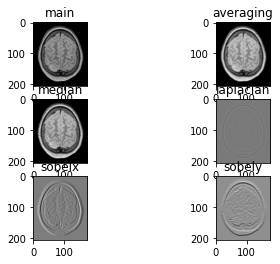

In [22]:
img = cv.imread('MRI.png',0)


plt.subplot(321)
plt.imshow(img, cmap = 'gray')
plt.title('main')

plt.subplot(322)
plt.imshow(filter(img, "averaging", 3), cmap = 'gray')
plt.title('averaging')

plt.subplot(323)
plt.imshow(filter(img, "median", 3), cmap = 'gray')
plt.title('median')

plt.subplot(324)
plt.imshow(filter(img, "laplacian", None), cmap = 'gray')
plt.title('laplacian')

plt.subplot(325)
plt.imshow(filter(img, "sobelx", None), cmap = 'gray')
plt.title('sobelx')

plt.subplot(326)
plt.imshow(filter(img, "sobely", None), cmap = 'gray')
plt.title('sobely')

plt.show()

### C

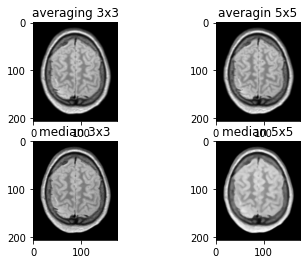

In [23]:
plt.subplot(221)
plt.imshow(filter(img, "averaging", 3), cmap = 'gray')
plt.title("averaging 3x3")

plt.subplot(222)
plt.imshow(filter(img, "averaging", 5), cmap = 'gray')
plt.title("averagin 5x5")

plt.subplot(223)
plt.imshow(filter(img, "median", 3), cmap = 'gray')
plt.title("median 3x3")

plt.subplot(224)
plt.imshow(filter(img, "median", 5), cmap = 'gray')
plt.title("median 5x5")
plt.show()

### D

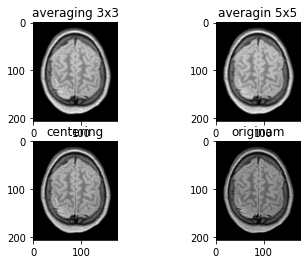

In [24]:
plt.subplot(221)
plt.imshow(filter(img, "averaging", 3), cmap = 'gray')
plt.title("averaging 3x3")

plt.subplot(222)
plt.imshow(filter(img, "averaging", 5), cmap = 'gray')
plt.title("averagin 5x5")

plt.subplot(223)
plt.imshow(filter(img, "centering", None), cmap = 'gray')
plt.title("centering")

plt.subplot(224)
plt.imshow(img, cmap = 'gray')
plt.title("originam")
plt.show()